# Mapping function to the columns of DataFrame

Sometimes we want to apply our own function to some column of dataframe.<br>
For example, we have a present value of stock market data and future value as well and we want we predict whether we need to purchase stock not. Now for a basic understanding, we will purchase if future value is higher than present value

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
style.use("fivethirtyeight")

In [2]:
def make_perdiction(present_val,future_val):
    if(future_val>present_val):
        return 1
    else:
        return 0

In [12]:
df = pd.read_pickle('fiddy_states_data.pickle')
df['TX_future'] = df['TX'].shift(-1)  ##getting future values by shifting present value to back-one  
df['TX_prediction'] = list(map(make_perdiction,df['TX'],df['TX_future']))
df = df.dropna()
print(df[['TX','TX_future','TX_prediction']].head())

                   TX  TX_future  TX_prediction
Date                                           
1975-01-31  32.582514  32.956762              1
1975-02-28  32.956762  33.592795              1
1975-03-31  33.592795  34.460884              1
1975-04-30  34.460884  34.658289              1
1975-05-31  34.658289  34.159936              0


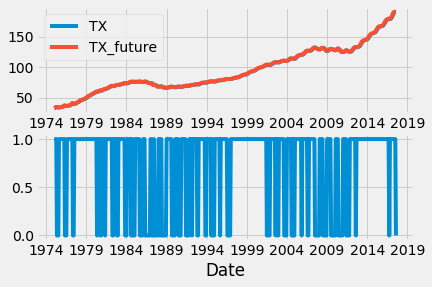

In [11]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
df[['TX','TX_future']].plot(ax = ax1)
df['TX_prediction'].plot(ax = ax2)
plt.show()
